<a href="https://colab.research.google.com/github/Yosri15/Titanic_Classification/blob/main/Titanic_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier


from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/Titanic_Classification/train.csv'
test_path = '/content/drive/MyDrive/Titanic_Classification/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#check the 5 first rows of the train_df
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [4]:
# Check the structure and data types of the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000,887.000000,889.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,665.466817,29.322063,2.307087
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,380.796997,13.930089,0.837713
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.420000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,336.000000,20.000000,2.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,672.000000,28.000000,3.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,996.000000,38.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1314.000000,74.000000,3.000000


In [6]:
# Calculate the mean survival rate for each passenger class (Pclass).
train_df.groupby(['Pclass'],as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
train_df.groupby(['Sex'],as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
train_df.groupby(['SibSp'],as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [9]:
train_df.groupby(['Parch'],as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [10]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch'] + 1

In [11]:
train_df.groupby(['Family_Size'],as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [12]:
# Map family sizes to categories (Alone, Small, Medium, Large) and create a new column 'Family_Size_Grouped' for both train and test datasets.
family_map = {1:'Alone', 2:'Small', 3:'Small', 4:'Medium', 5:'Medium', 6:'Medium', 7:'Large', 8:'Large', 11:'Large'}
train_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_Grouped'] = test_df['Family_Size'].map(family_map)


In [13]:
train_df.groupby(['Family_Size_Grouped'],as_index=False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.409091
3,Small,0.562738


In [14]:
train_df.groupby(['Embarked'],as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


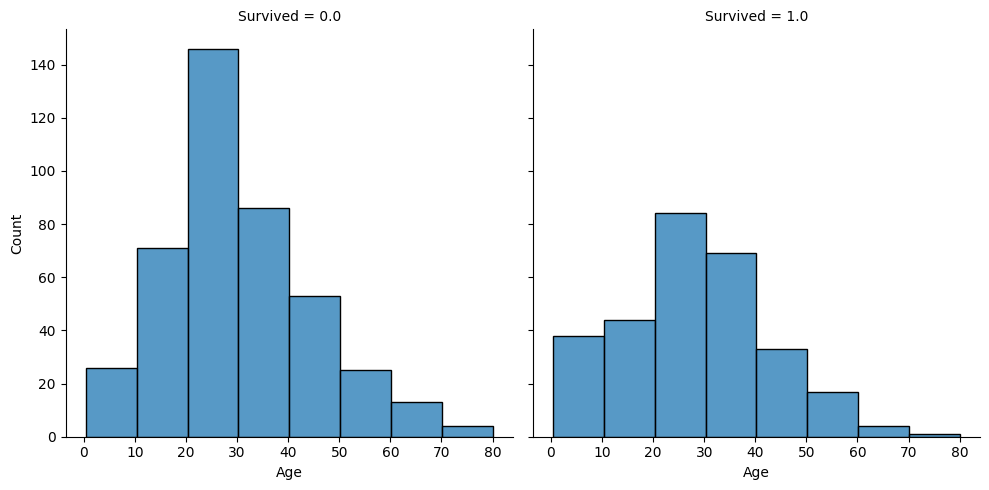

In [15]:
sns.displot(x='Age', col='Survived',data=train_df, binwidth=10 , height=5)

In [16]:
# Divide the 'Age' column into 8 equal-sized bins (quantiles) and create a new column 'Age_Cut' for both train and test datasets.
train_df['Age_Cut'] = pd.qcut(train_df['Age'], 8)
test_df['Age_Cut'] = pd.qcut(test_df['Age'], 8)

In [17]:
train_df.groupby(['Age_Cut'],as_index=False)['Survived'].mean()

<ipython-input-17-351039488c3e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'],as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [18]:
#If a passenger's Age is less than or equal to 16--> Set their Age to 0. This groups all ages ≤ 16 into category 0
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 20.125), 'Age'] = 1
train_df.loc[(train_df['Age'] > 20.125) & (train_df['Age'] <= 24), 'Age'] = 2
train_df.loc[(train_df['Age'] > 24) & (train_df['Age'] <= 28), 'Age'] = 3
train_df.loc[(train_df['Age'] > 28) & (train_df['Age'] <= 32.312), 'Age'] = 4
train_df.loc[(train_df['Age'] > 32.312) & (train_df['Age'] <= 38), 'Age'] = 5
train_df.loc[(train_df['Age'] > 38) & (train_df['Age'] <= 47), 'Age'] = 6
train_df.loc[(train_df['Age'] > 47) & (train_df['Age'] <= 80), 'Age'] = 7
train_df.loc[train_df['Age'] > 80, 'Age'] = 8

test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 20.125), 'Age'] = 1
test_df.loc[(test_df['Age'] > 20.125) & (test_df['Age'] <= 24), 'Age'] = 2
test_df.loc[(test_df['Age'] > 24) & (test_df['Age'] <= 28), 'Age'] = 3
test_df.loc[(test_df['Age'] > 28) & (test_df['Age'] <= 32.312), 'Age'] = 4
test_df.loc[(test_df['Age'] > 32.312) & (test_df['Age'] <= 38), 'Age'] = 5
test_df.loc[(test_df['Age'] > 38) & (test_df['Age'] <= 47), 'Age'] = 6
test_df.loc[(test_df['Age'] > 47) & (test_df['Age'] <= 80), 'Age'] = 7
test_df.loc[test_df['Age'] > 80, 'Age'] = 8


In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0.0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,...,22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,2,Small,"(20.125, 24.0]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,...,35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0,2,Small,"(32.312, 38.0]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,...,26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0,1,Alone,"(24.0, 28.0]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,...,35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0,2,Small,"(32.312, 38.0]"
4,5,0.0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,...,35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0,1,Alone,"(32.312, 38.0]"


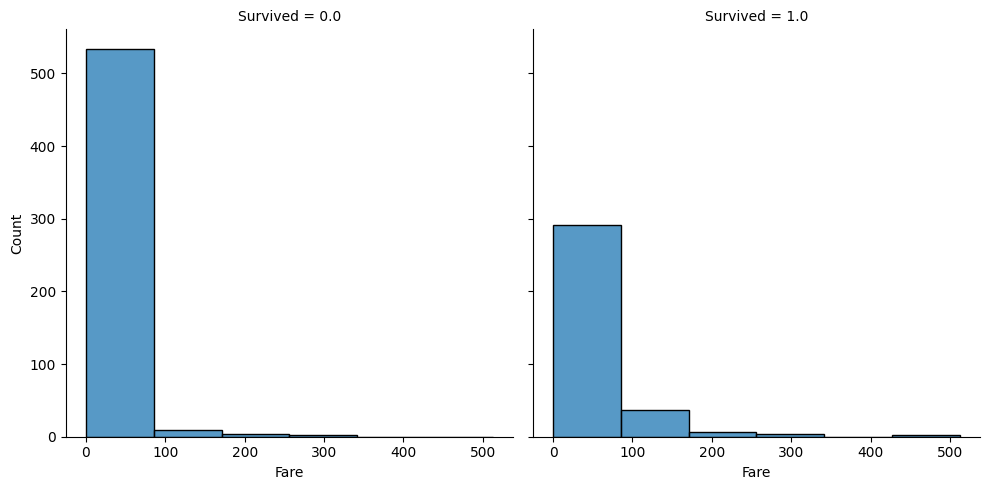

In [20]:
# Create a histogram to visualize the distribution of 'Fare' for each survival status ('Survived').
sns.displot(data=train_df, x='Fare', col='Survived',binwidth=80,height=5)

In [21]:
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'], 6)
test_df['Fare_Cut'] = pd.qcut(test_df['Fare'], 6)

In [22]:
train_df.groupby(['Fare_Cut'],as_index=False)['Survived'].mean()

<ipython-input-22-08a1e360f460>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'],as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [23]:
#If a passenger's Fare is less than or equal to 7.775--> Set their Fare to 0. This groups all Fares ≤ 16 into category 0
train_df.loc[train_df['Fare'] <= 7.775, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.775) & (train_df['Fare'] <= 8.662), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 8.662) & (train_df['Fare'] <= 14.454), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 26.0), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 26.0) & (train_df['Fare'] <= 52.369), 'Fare'] = 4
train_df.loc[(train_df['Fare'] > 52.369) & (train_df['Fare'] <= 512.329), 'Fare'] = 5
train_df.loc[train_df['Fare'] > 512.329, 'Fare'] = 6

test_df.loc[test_df['Fare'] <= 7.775, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.775) & (test_df['Fare'] <= 8.662), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 8.662) & (test_df['Fare'] <= 14.454), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 26.0), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 26.0) & (test_df['Fare'] <= 52.369), 'Fare'] = 4
test_df.loc[(test_df['Fare'] > 52.369) & (test_df['Fare'] <= 512.329), 'Fare'] = 5
test_df.loc[test_df['Fare'] > 512.329, 'Fare'] = 6

In [24]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Hometown,Boarded,Destination,Lifeboat,Body,Class,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut
0,1,0.0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,2,Small,"(20.125, 24.0]","(-0.001, 7.775]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0,1,Alone,"(24.0, 28.0]","(7.775, 8.662]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
4,5,0.0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0,1,Alone,"(32.312, 38.0]","(7.775, 8.662]"


In [25]:
train_df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [26]:
# Extract the title from the 'Name' column by splitting the name string and create a new 'title' column (e.g., Mr, Mrs, Miss).
train_df['title'] = train_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat=".",expand=True)[0].apply(lambda x:x.strip()) #lambda is a function that removes the spaces from each name
test_df['title'] = test_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat=".",expand=True)[0].apply(lambda x:x.strip())


In [27]:
train_df.groupby(['title'],as_index=False)['Survived'].mean()

,title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [28]:
#military Capt, Col, Major
#noble - Jonkheer, the Countess, Don, Lady, Sir
#unmaried Female - Mlle, Ms, Mme

In [29]:
# Replace specific titles in the 'title' column with broader categories (e.g., military, noble, unmarried female). to lower the number of rows.
train_df['title'] = train_df['title'].replace({
    'Capt':'military',
    'Col':'military',
    'Major':'military',
    'Jonkheer':'noble',
    'the Countess':'noble',
    'Don':'noble',
    'Lady':'noble',
    'Sir':'noble',
    'Mlle':'unmaried Female',
    'Ms':'unmaried Female',
    'Mme':'unmaried Female',
    'Miss' : 'unmaried Female'
})

test_df['title'] = test_df['title'].replace({
    'Capt':'military',
    'Col':'military',
    'Major':'military',
    'Jonkheer':'noble',
    'the Countess':'noble',
    'Don':'noble',
    'Lady':'noble',
    'Sir':'noble',
    'Mlle':'unmaried Female',
    'Ms':'unmaried Female',
    'Mme':'unmaried Female',
    'Miss' : 'unmaried Female'
})

In [30]:
# Group the data by 'title', and calculate the count of passengers and the mean survival rate for each title.
train_df.groupby(['title'],as_index=False)['Survived'].agg(['count','mean'])

,title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Mr,517,0.156673
3,Mrs,125,0.792000
4,Rev,6,0.000000
5,military,5,0.400000
6,noble,5,0.600000
7,unmaried Female,186,0.704301


In [31]:
# Create a new column 'Name_Length' that stores the length of each passenger's name.
train_df['Name_Length'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x: len(x))

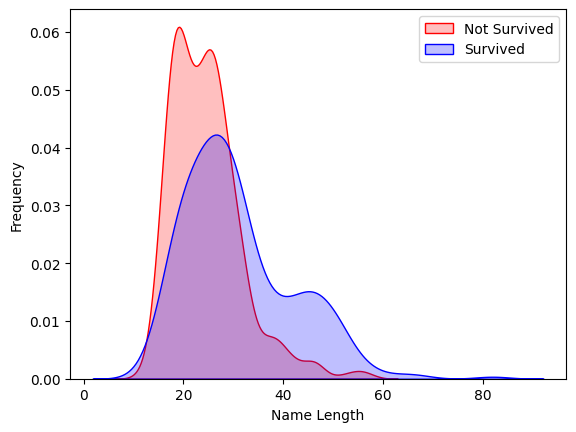

In [32]:
# Plot the Kernel Density Estimation (KDE) of 'Name_Length' for passengers who did not survive (red) and survived (blue).
# This visualizes the distribution of name lengths based on survival status.

g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==0) & (train_df['Name_Length'].notnull())], color='red', fill=True)
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==1) & (train_df['Name_Length'].notnull())], ax=g,color='blue', fill=True)
g.set_xlabel('Name Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

In [33]:
# Divide the 'Name_Length' column into 8 equal-sized bins (quantiles) and create a new column 'Name_LengthGB' for both train and test datasets.
train_df['Name_LengthGB'] = pd.qcut(train_df['Name_Length'], 8)
test_df['Name_LengthGB'] = pd.qcut(test_df['Name_Length'], 8)

In [34]:
train_df.groupby(['Name_LengthGB'],as_index=False)['Survived'].mean()

<ipython-input-34-a93232fc6d1f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_LengthGB'],as_index=False)['Survived'].mean()


,Name_LengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [35]:
# Convert 'Name_Length' into categories based on predefined ranges.
train_df.loc[train_df['Name_Length'] <= 11.999, 'Name_Size'] = 0
train_df.loc[(train_df['Name_Length'] > 11.999) & (train_df['Name_Length'] <= 20.0), 'Name_Size'] = 1
train_df.loc[(train_df['Name_Length'] > 20.0) & (train_df['Name_Length'] <= 23.0), 'Name_Size'] = 2
train_df.loc[(train_df['Name_Length'] > 23.0) & (train_df['Name_Length'] <= 25.0), 'Name_Size'] = 3
train_df.loc[(train_df['Name_Length'] > 25.0) & (train_df['Name_Length'] <= 27.25), 'Name_Size'] = 4
train_df.loc[(train_df['Name_Length'] > 27.25) & (train_df['Name_Length'] <= 30.0), 'Name_Size'] = 5
train_df.loc[(train_df['Name_Length'] > 30.0) & (train_df['Name_Length'] <= 38.0), 'Name_Size'] = 6
train_df.loc[(train_df['Name_Length'] > 38.0) & (train_df['Name_Length'] <= 82.0), 'Name_Size'] = 7
train_df.loc[train_df['Name_Length'] > 82.0, 'Name_Size'] = 8

test_df.loc[test_df['Name_Length'] <= 11.999, 'Name_Size'] = 0
test_df.loc[(test_df['Name_Length'] > 11.999) & (test_df['Name_Length'] <= 20.0), 'Name_Size'] = 1
test_df.loc[(test_df['Name_Length'] > 20.0) & (test_df['Name_Length'] <= 23.0), 'Name_Size'] = 2
test_df.loc[(test_df['Name_Length'] > 23.0) & (test_df['Name_Length'] <= 25.0), 'Name_Size'] = 3
test_df.loc[(test_df['Name_Length'] > 25.0) & (test_df['Name_Length'] <= 27.25), 'Name_Size'] = 4
test_df.loc[(test_df['Name_Length'] > 27.25) & (test_df['Name_Length'] <= 30.0), 'Name_Size'] = 5
test_df.loc[(test_df['Name_Length'] > 30.0) & (test_df['Name_Length'] <= 38.0), 'Name_Size'] = 6
test_df.loc[(test_df['Name_Length'] > 38.0) & (test_df['Name_Length'] <= 82.0), 'Name_Size'] = 7
test_df.loc[test_df['Name_Length'] > 82.0, 'Name_Size'] = 8

In [36]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Body,Class,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,title,Name_Length,Name_LengthGB,Name_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,NaN,3.0,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,NaN,1.0,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,NaN,3.0,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",unmaried Female,22,"(20.0, 23.0]",2.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,NaN,1.0,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0
4,5,0.0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,NaN,3.0,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0


In [37]:
train_df['Ticket']

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


In [38]:
# Extract the last part of the 'Ticket' column (ticket number) to avoid issues with symbols or other characters at the beginning,
# and create a new column 'Ticket_Number' for both train and test datasets.

train_df['Ticket_Number'] = train_df['Ticket'].str.split().apply(lambda x: x[-1])
test_df['Ticket_Number'] = test_df['Ticket'].str.split().apply(lambda x: x[-1])

In [39]:
train_df.groupby(['Ticket_Number'],as_index=False)['Survived'].agg(['count','mean']).sort_values(by='count',ascending=False)

,Ticket_Number,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [40]:
# Adds a column with the count of occurrences of each Ticket_Number in the dataset

train_df['Ticket_Number_Counts'] = train_df.groupby('Ticket_Number')['Ticket_Number'].transform('count')

In [41]:
# Groups the data by Ticket_Number_Counts and calculates the count and mean of the Survived column for each group,
# then sorts the result by the count of each group in descending order

train_df.groupby(['Ticket_Number_Counts'],as_index=False)['Survived'].agg(['count','mean']).sort_values(by='count',ascending=False)

,Ticket_Number_Counts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [42]:
# Replace missing values in the 'Cabin' column with 'U', then extract the first letter of each value.
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series([i[0] for i in train_df['Cabin']])

test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series([i[0] for i in test_df['Cabin']])

In [43]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count','mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [44]:
# Assign 0 to 'Cabin_Assigned' if 'Cabin' is 'U' (unknown), otherwise assign 1.
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x:0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x:0 if x in ['U'] else 1)

In [45]:
train_df.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['count','mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [46]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_Size_Grouped,Age_Cut,Fare_Cut,title,Name_Length,Name_LengthGB,Name_Size,Ticket_Number,Ticket_Number_Counts,Cabin_Assigned
0,1,0.0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,Alone,"(24.0, 28.0]","(7.775, 8.662]",unmaried Female,22,"(20.0, 23.0]",2.0,3101282,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2,1
4,5,0.0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1,0


In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PassengerId           891 non-null    int64   
 1   Survived              891 non-null    float64 
 2   Pclass                891 non-null    int64   
 3   Name                  891 non-null    object  
 4   Sex                   891 non-null    object  
 5   Age                   714 non-null    float64 
 6   SibSp                 891 non-null    int64   
 7   Parch                 891 non-null    int64   
 8   Ticket                891 non-null    object  
 9   Fare                  891 non-null    float64 
 10  Cabin                 891 non-null    object  
 11  Embarked              889 non-null    object  
 12  WikiId                889 non-null    float64 
 13  Name_wiki             889 non-null    object  
 14  Age_wiki              887 non-null    float64 
 15  Hometo

In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          418 non-null    int64   
 1   Pclass               418 non-null    int64   
 2   Name                 418 non-null    object  
 3   Sex                  418 non-null    object  
 4   Age                  332 non-null    float64 
 5   SibSp                418 non-null    int64   
 6   Parch                418 non-null    int64   
 7   Ticket               418 non-null    object  
 8   Fare                 417 non-null    float64 
 9   Cabin                418 non-null    object  
 10  Embarked             418 non-null    object  
 11  WikiId               415 non-null    float64 
 12  Name_wiki            415 non-null    object  
 13  Age_wiki             415 non-null    float64 
 14  Hometown             415 non-null    object  
 15  Boarded              41

In [49]:
# Fills missing values in the 'Age' and 'Fare' columns with their respective mean values to handle missing data.
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)


<ipython-input-49-a6ee9bdf88f7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
<ipython-input-49-a6ee9bdf88f7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [50]:
# Converts categorical columns into binary columns for each category (one-hot encoding).
ohe = OneHotEncoder (sparse_output=False)

# Transforms categorical columns into ordinal numeric values (one integer per category).
ode = OrdinalEncoder

# Replaces missing values with the most frequent (modal) value in each column.
SI = SimpleImputer (strategy='most_frequent')

In [51]:
ode_cols = ['Family_Size_Grouped']
ohe_cols = ['Sex','Embarked']

<Axes: >

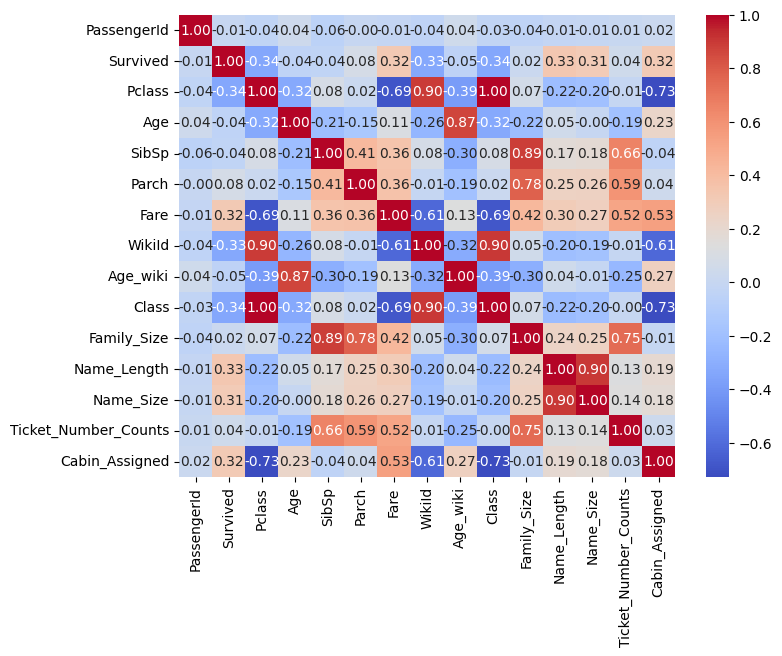

In [52]:
correlation_matrix = train_df.corr(numeric_only=True)
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [53]:
X = train_df.drop(['Survived', 'SibSp', 'Parch'], axis=1)
y = train_df['Survived']
X_test = test_df.drop(['Age_Cut', 'Fare_Cut', 'SibSp', 'Parch'], axis=1)

In [54]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify = y, random_state=21)

In [55]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [56]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))
])

In [64]:
col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
     ('passthrough', 'passthrough', ['Pclass', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare', 'Ticket_Number_Counts'])
    ],
    remainder='drop',
    n_jobs=-1)

In [65]:
rfc = RandomForestClassifier()

In [66]:
param_grid = {
    'n_estimators': [150, 200, 300, 500],
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 13, 15, 17, 20],
    'min_samples_leaf': [2, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
}

In [67]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [68]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'Ticket_Number_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 13, 15, 17, 20],
                                          'min_samples_leaf': [2, 4, 5, 6],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [150, 200, 300,
                                                           500]}))])

In [69]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
0.8244558258642766
